Logbook:
https://docs.google.com/document/d/10F1qXnhcWOobazE5PRGmF3VUbtTOQDvJnlBE9xEdjEs/edit

# imports

In [5]:
from tqdm.notebook import tqdm
from glob import glob
from os.path import basename, exists
import xarray as xr
import dask.dataframe as dd
import dask.array as da
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation
import matplotlib.pyplot as plt

# loop

In [2]:
files = sorted(glob('../data/*K_reduced.h5'))
files

['../data\\200.0K_reduced.h5',
 '../data\\225.0K_reduced.h5',
 '../data\\230.0K_reduced.h5',
 '../data\\230.5K_reduced.h5',
 '../data\\231.0K_reduced.h5',
 '../data\\232.0K_reduced.h5']

In [6]:
ds

<xarray.Dataset>
Dimensions:      (time: 2048, row: 800, col: 800)
Coordinates:
  * time         (time) int32 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * row          (row) int32 0 1 2 3 4 5 6 7 ... 792 793 794 795 796 797 798 799
  * col          (col) int32 0 1 2 3 4 5 6 7 ... 792 793 794 795 796 797 798 799
Data variables:
    image_stack  (time, row, col) float32 ...
Attributes:
    temperature:  200.0

  0%|          | 0/6 [00:00<?, ?it/s]

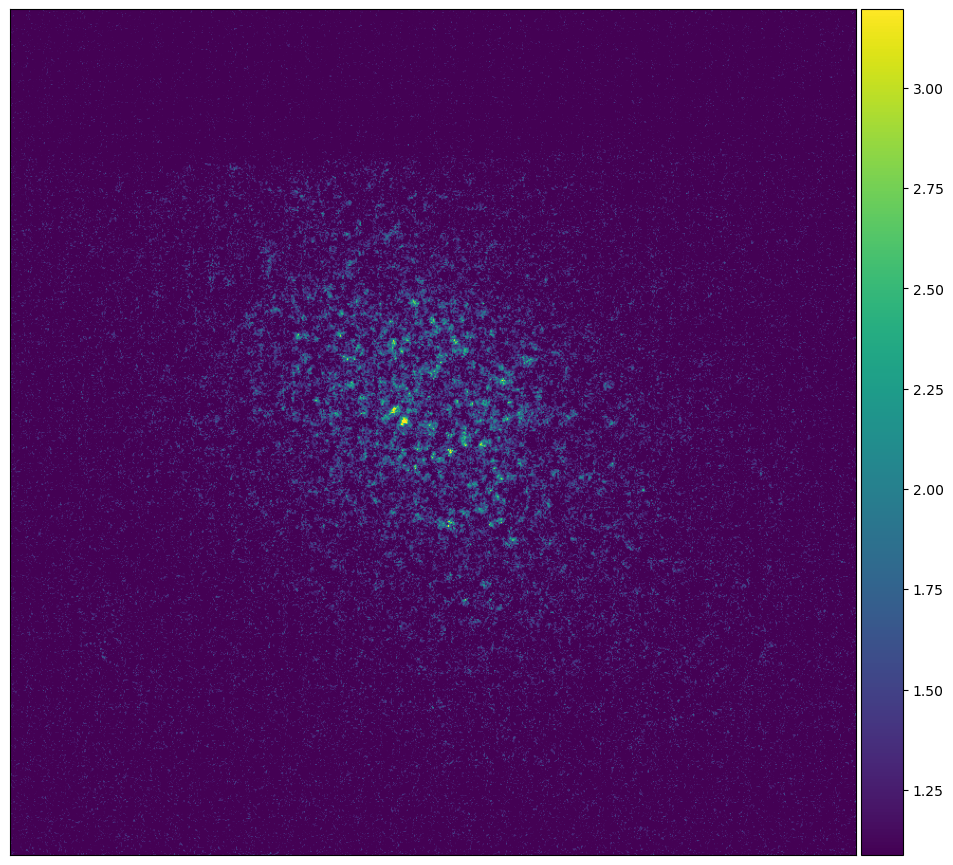

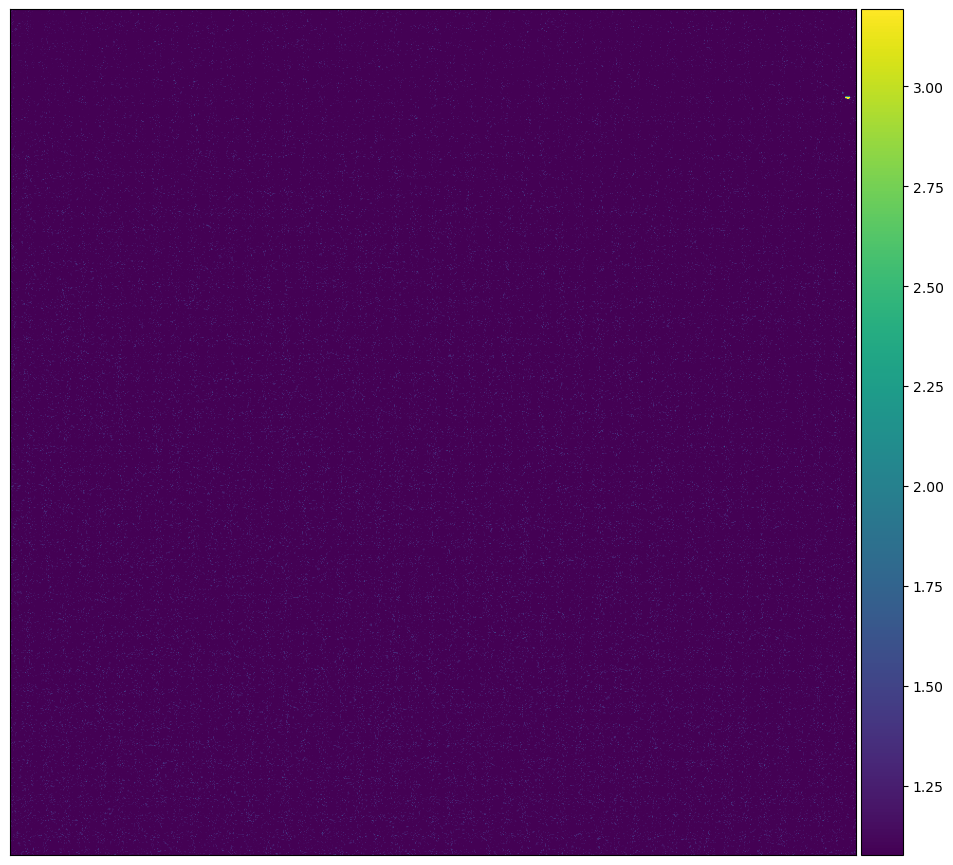

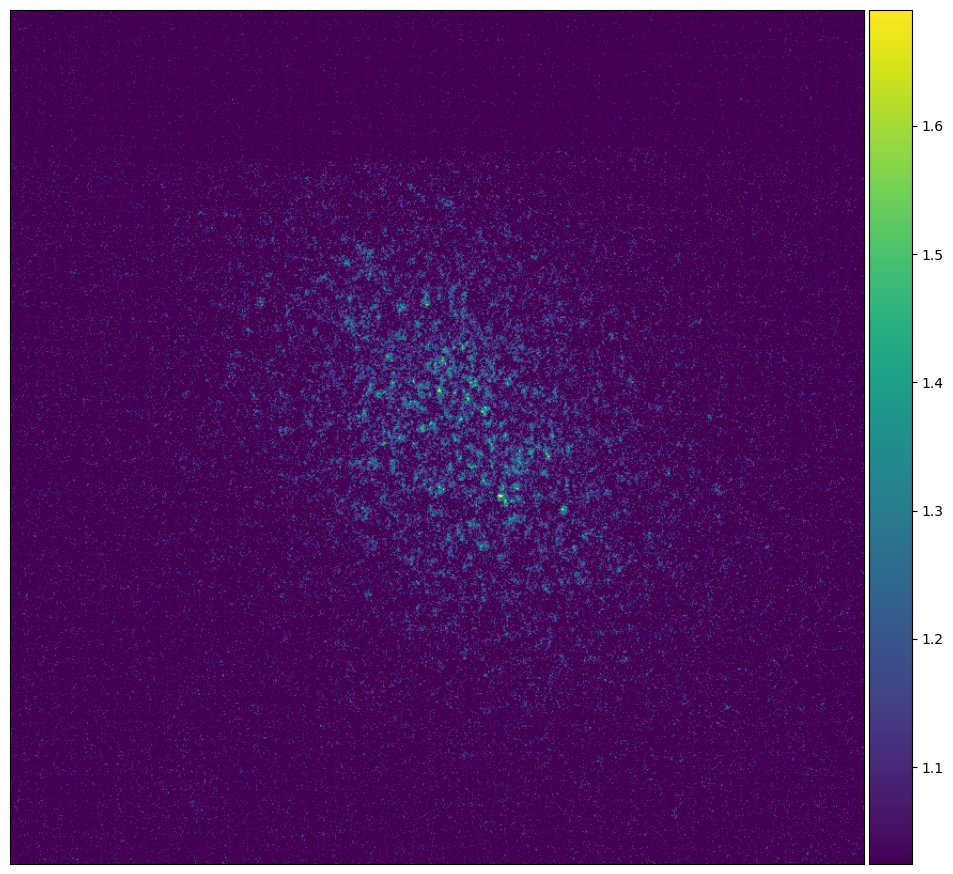

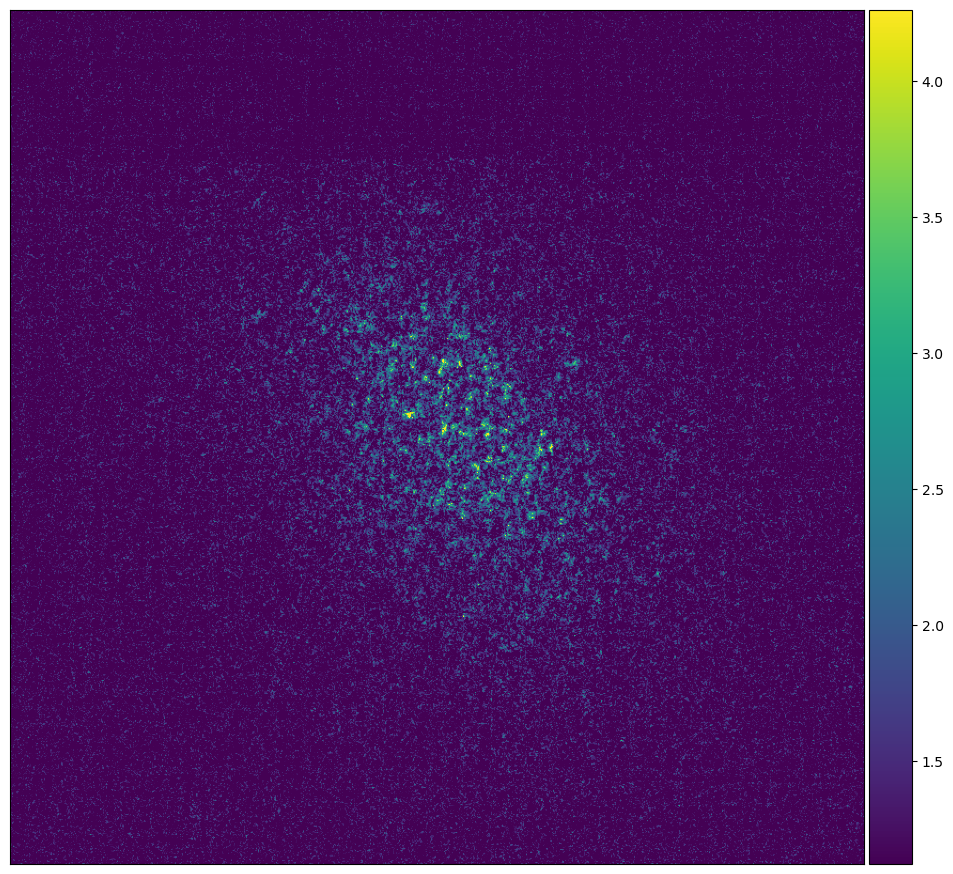

In [41]:
for file in tqdm(files):
    ds = xr.open_dataset(file)
    temp = ds.temperature
    out_file = f'../data/{temp}K_reduced.mp4'
    if exists(out_file):
        continue

    arr = ds['image_stack'].to_numpy()
    
    vmin = np.percentile(arr[1:100].mean(axis=0), 70)
    vmax = np.percentile(arr[1:100].mean(axis=0), 100)

    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    im = ax.imshow(arr[0], vmin=vmin, vmax=vmax)
    plt.tight_layout()

    ax.set_xticks([])
    ax.set_yticks([])
    ani = animation.FuncAnimation(fig, animate, frames=range(len(arr)))

    ani.save(out_file)
    plt.show()

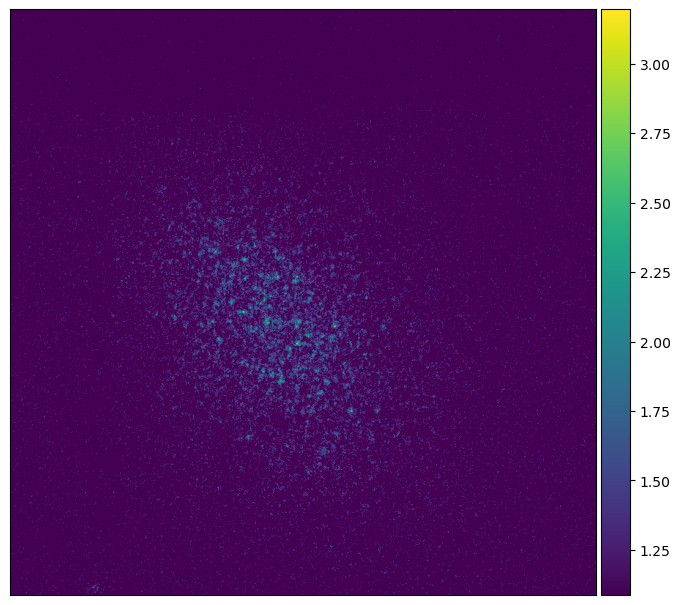

In [40]:


def animate(i):
    im.set_data(arr[i])

    return im,

arr = ds['image_stack'].to_numpy()
vmin = np.percentile(arr[1:100].mean(axis=0), 70)
vmax = np.percentile(arr[1:100].mean(axis=0), 100)
out_file = f'../data/test.mp4'

fig, ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
im = ax.imshow(arr[0], vmin=vmin, vmax=vmax)
plt.tight_layout()

ax.set_xticks([])
ax.set_yticks([])
ani = animation.FuncAnimation(fig, animate, frames=range(len(arr)))

#FFwriter = animation.FFMpegWriter(fps=5)
ani.save(out_file)
plt.show()

In [7]:
for file in tqdm(files):
    ds = xr.open_dataset(file)
    temp = ds.temperature
    out_file = f'../data/{temp}K_reduced.mp4'
    if exists(out_file):
        continue

    arr = ds['image_stack'].rename({'row': 'y', 'col': 'x'})
    tmp.rio.to_raster(out_file)

  0%|          | 0/6 [00:00<?, ?it/s]